# Pipeline for Regression Tasks

This pipeline is designed to build a regression model on datasets containing numeric and categorical attributes. It provides all the classic machine learning steps for predicting numeric values for a single target variable. The purpose of this pipeline is to reduce the number of operations that depend on the structure of a particular dataset. In order not to overload the pipeline with specially written functions, they are placed in separate Python files at `helpers` directory.

# Introduction

Some resume about the dataset.

## 1. Exploratory Data Analysis

In [55]:
# Standard library
import os
import itertools

# Data packages
import scipy
import numpy as np
import pandas as pd
import pandas_profiling
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# Visualization
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# My modules to resume coding
from helpers import vhelper, dhelper

# Models libraries
import sklearn
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor

# Pipeline processing
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Progress visualization
from tqdm import tqdm

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
pd.options.mode.chained_assignment = None

# To make this notebook's output identical at every run
np.random.seed(0)

%matplotlib inline

In [2]:
# Change this constants for another table
DATASET_URL = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"
DATASET_PATH = os.path.join("datasets")

target_col = "median_house_value"

Fetch and load data.

In [3]:
dhelper.fetch_data(DATASET_URL, DATASET_PATH)
df = dhelper.load_data(DATASET_PATH)

df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

Let's build a report on the primary data analysis using `pandas_profiling`.

In [4]:
pandas_profiling.ProfileReport(df)

The data used to build the pipeline is not divided into training and test samples. We do this splitting now to make pipeline easier to apply to new data. We also separate the target variable from the dataset.

In [5]:
X = df.drop([target_col], axis=1)
y = df[target_col]

_ = train_test_split(X, y, test_size = 0.2,
                     random_state=0)
X, X_test, y, y_test = _

See the structure of dataset.

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12069 to 2732
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [7]:
y

12069    500001.0
15925    270000.0
11162    196100.0
4904     118800.0
4683     225000.0
           ...   
13123    144600.0
19648    159400.0
9845     289300.0
10799    484600.0
2732      69400.0
Name: median_house_value, Length: 16512, dtype: float64

We make lists of columns corresponding to numeric and categorical data, as well as columns with missing values.

In [9]:
X_num = X[[col for col in X.columns if is_numeric_dtype(X[col])]]
X_cat = X[[col for col in X.columns if is_string_dtype(X[col])]]

dhelper.current_cols_status(X_num, X_cat)

numerical columns:
 - longitude
 - latitude
 - housing_median_age
 - total_rooms
 - total_bedrooms
 - population
 - households
 - median_income
numerical columns with N/A values:
 - total_bedrooms
categorical columns:
 - ocean_proximity
categorical columns with N/A values:
 ----


## 1.2. EDA for Numerical Features

In [8]:
X.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  16512.000000  16512.000000        16512.000000  16512.000000   
mean    -119.563008     35.624783           28.619065   2640.140322   
std        2.005251      2.136552           12.600999   2186.893548   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1448.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.710000           37.000000   3149.000000   
max     -114.310000     41.950000           52.000000  32627.000000   

       total_bedrooms    population    households  median_income  
count    16354.000000  16512.000000  16512.000000   16512.000000  
mean       537.639110   1425.437742    499.353319       3.876298  
std        422.335242   1143.062756    382.482829       1.906783  
min          1.000000      3.000000      1.000000       0.499900  
25%        294.000000    785.000000    279.000000       2.566625  
50%        434.000000   1166.000000    409.500000       3.548500  
75%        647.000000   1724.000000    605.000000       4.747575  
max       6445.000000  35682.000000   6082.000000      15.000100

Plotting the distribution of numerical variables.

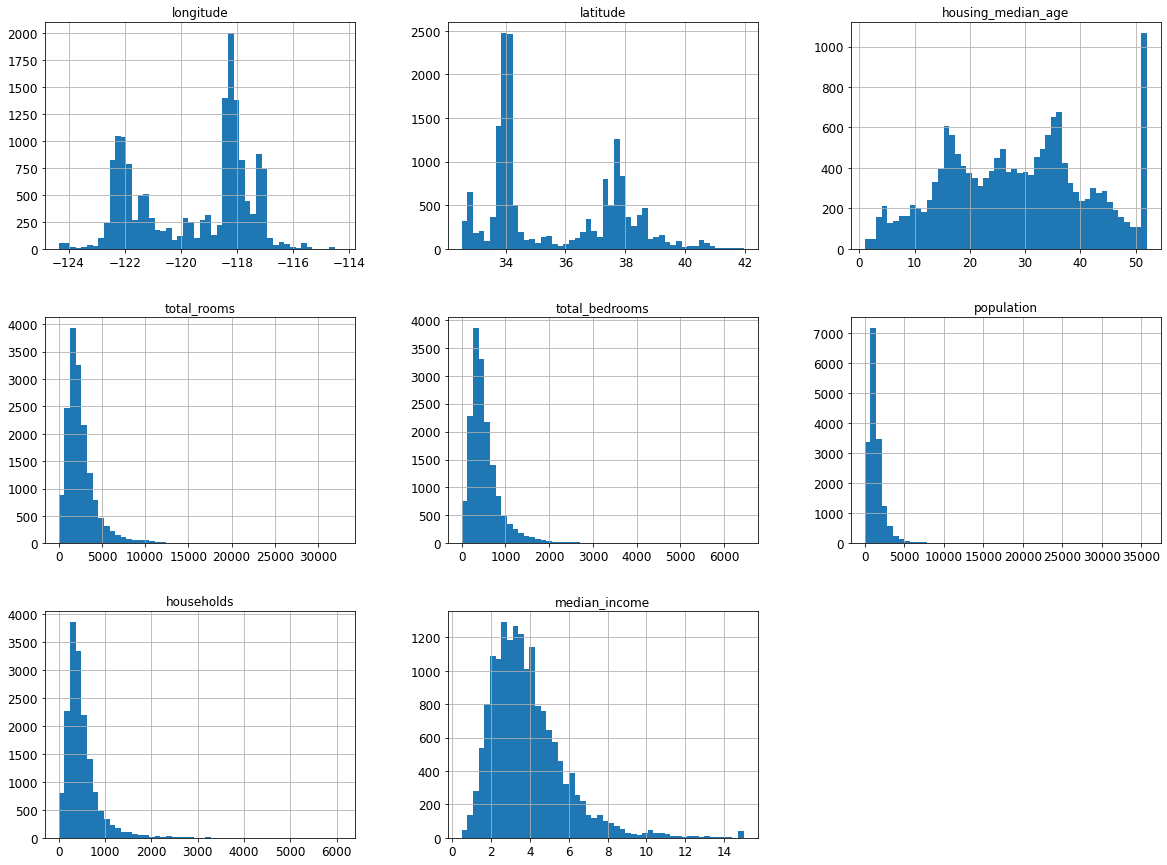

In [14]:
X_num.hist(bins=50, figsize=(20,15));

## 1.2. EDA for Categorical Features

N/A yet.

# 2. Data Preprocessing

## 2.1. Cleaning Non-informative Data
- Duplicates
- Non-relevant

## 2.2. Factorizing and One-Hot Encoding

In [ ]:
def smart_factorize(df, cat_cols):
    for cat_col in cat_cols:
        cat_num = df[cat_col].nunique()
        test = dict()
        keys = df[cat_col].unique()
        for p in itertools.permutations(np.arange(cat_num)):
            d = dict(zip(keys, p))
            test[str(p)] = df[cat_col].replace(d)
        test = pd.DataFrame(test)
        s = test.apply(lambda x: np.corrcoef(x, y)[0, 1], axis=0)\
        .abs().sort_values(ascending=False)
        df[f'{cat_col}_factorized'] = test[s.index[0]]
    return df

if cat_cols:
    df = smart_factorize(df, cat_cols)

    from sklearn.preprocessing import OneHotEncoder
    encoder = OneHotEncoder()
    encoded = pd.DataFrame(encoder.fit_transform(df[cat_cols]).toarray(),
             columns = encoder.get_feature_names())
    df = pd.concat([df, encoded], axis=1)
    df.drop(cat_cols, axis=1)

## 2.3. Feature Scaling

In [255]:
class Scaler(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        scaler = StandardScaler()
        X = pd.DataFrame(data = scaler.fit_transform(X),
                              columns = X.columns)
        return X

pipeline = Pipeline([
    ('scaler', Scaler())
])

pipeline.fit_transform(X_num)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       1.003899 -0.840062           -1.795076    -1.558414       -1.694511   
1      -1.434772  0.985364            1.855539     0.230055        0.244948   
2       0.779481 -0.840062           -0.207852    -0.401002       -0.253903   
3       0.649818 -0.755812            0.744482    -1.372809       -1.079106   
4       0.599947 -0.723048            1.855539     0.222440        0.753123   
...          ...       ...                 ...          ...             ...   
16507  -0.846300  1.238115           -0.684019    -0.785537       -0.981200   
16508  -0.661778  0.868349           -0.128491    -0.972093       -1.139714   
16509  -1.165471  0.447097            0.188954    -0.674174       -0.143750   
16510   0.814390 -0.938355            0.427037    -0.013611        0.272921   
16511   1.996323 -1.322162           -1.080825    -0.921647       -0.519647   

       population  households  median_income  
0       -1.637461   -1.740485       0.429246  
1        0.543278    0.178177       0.534155  
2       -0.259970   -0.218614       0.217416  
3       -0.733591   -1.032288      -1.494986  
4       -0.063929    0.826102      -0.307684  
...           ...         ...            ...  
16507   -0.797781   -0.966993       0.549905  
16508   -0.910548   -1.017220      -0.490164  
16509   -0.811660   -0.093048      -0.292974  
16510   -0.207923    0.283653       1.395698  
16511   -0.256500   -0.570202      -1.548481  

[16512 rows x 8 columns]

In [246]:
X_num

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       1.003899 -0.840062           -1.795076    -0.977736       -1.094083   
1      -1.434772  0.985364            1.855539    -0.118501       -0.108747   
2       0.779481 -0.840062           -0.207852    -0.421680       -0.362186   
3       0.649818 -0.755812            0.744482    -0.888566       -0.781428   
4       0.599947 -0.723048            1.855539    -0.122159        0.149431   
...          ...       ...                 ...          ...             ...   
16507  -0.846300  1.238115           -0.684019    -0.606422       -0.731687   
16508  -0.661778  0.868349           -0.128491    -0.696050       -0.812220   
16509  -1.165471  0.447097            0.188954    -0.552920       -0.306223   
16510   0.814390 -0.938355            0.427037    -0.235565       -0.094535   
16511   1.996323 -1.322162           -1.080825    -0.671814       -0.497196   

       population  households  median_income  
0       -1.047601   -1.135650       0.190012  
1        0.052109   -0.136882       0.269311  
2       -0.352955   -0.343433       0.029895  
3       -0.591794   -0.766994      -1.264470  
4       -0.254095    0.200399      -0.367016  
...           ...         ...            ...  
16507   -0.624165   -0.733005       0.281216  
16508   -0.681031   -0.759151      -0.504949  
16509   -0.631164   -0.278069      -0.355897  
16510   -0.326709   -0.081976       0.920532  
16511   -0.351205   -0.526453      -1.304906  

[16512 rows x 8 columns]

## 2.4. Outliers Processing

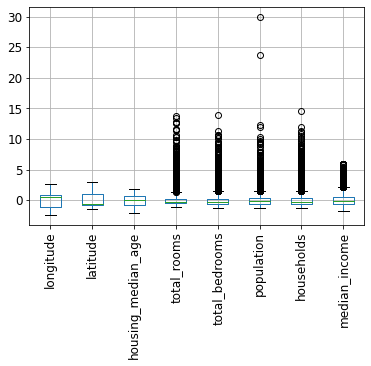

In [221]:
X_num.dropna().apply(scipy.stats.zscore).boxplot(rot=90);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         15065 non-null  float64
 4   total_bedrooms      15055 non-null  float64
 5   population          15082 non-null  float64
 6   households          15079 non-null  float64
 7   median_income       15808 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


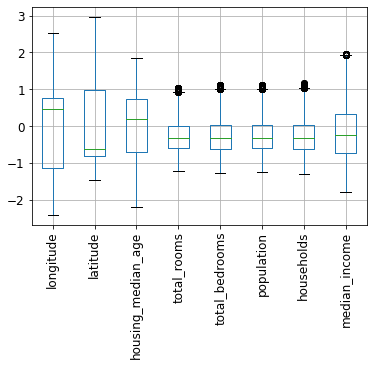

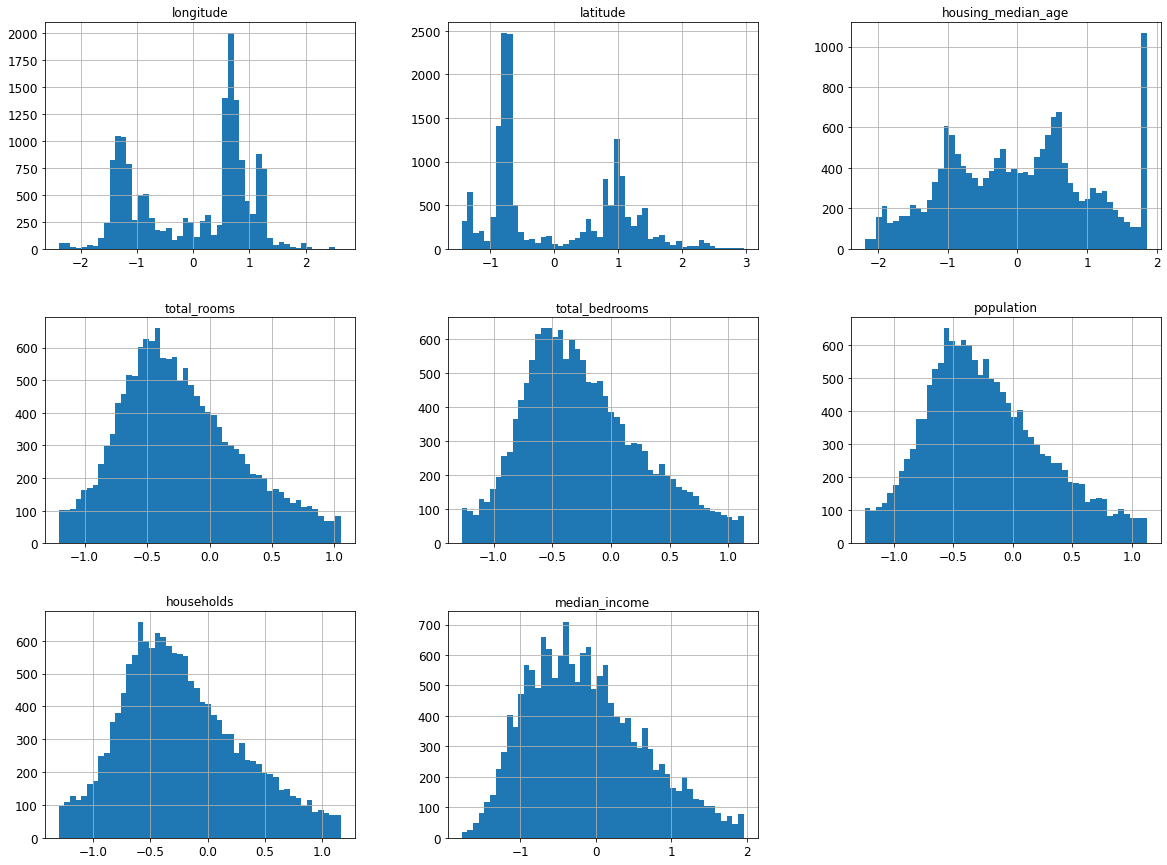

In [234]:
def simple_outlier_filter(X_num, k=1.5):
    '''Throws out columns from the dataframe
    which values are more than k*IQR'''
    for col in XX:
        Q1 = X_num[col].quantile(0.25)
        Q3 = X_num[col].quantile(0.75)
        IQR = Q3-Q1
        mask = X_num[col].between(Q1-k*IQR, Q3+k*IQR,
                                  inclusive=True)
        X_num[col] = X_num.loc[mask, col]
    return X_num

X_num = simple_outlier_filter(X_num)
X_num.info()

X_num.dropna().boxplot(rot=90);
X_num.hist(bins=50, figsize=(20,15));

## 2.4. Missing Values

Filling in the missing data for numeric attributes with ML-predicted values.

In [ ]:
from sklearn.base import Base

In [56]:
X_num = dhelper.smart_imputer(X_num)

In [ ]:
X_num.info()

In [ ]:
# _MISSING_ category for NA cells

## 2.6. First Steps of Feature Engineering

Now let's determine how the data features correlates with the target variable. Let's take pairs of features and check if there is a linear correlation between the target variable and the interacting attributes.

In [ ]:
d = dhelper.make_transformations(X.astype(float))

In [ ]:
total = pd.concat([d[key] for key in d], axis=1).dropna(axis=1, how='all')
basic_columns = total.columns

composition = []
coefficient = []
df_c = pd.DataFrame({'composition':[],
                     'coefficient':[]})


def find_good_compositions(df_c, num):
    '''Find compositions with good correlation coefficients
    for num of attributes '''
        
    for c in tqdm(set(itertools.combinations(basic_columns, num))):
        x = np.ones(total.shape[0])
        for i in range(num):
            x *= total[c[i]]
        cc = abs(np.corrcoef(x, y)[0, 1])
        if cc > 0.1:
            composition.append(' * '.join(c))
            coefficient.append(cc)
    return pd.concat([df_c, pd.DataFrame({'composition':composition,
                                         'coefficient':coefficient})], axis=0)

if not os.path.exists('df_c.csv'):
    df_c = find_good_compositions(df_c, 2)
    df_c = find_good_compositions(df_c, 3)
    df_c = df_c.sort_values(by='coefficient', ascending=False)
    df_c.to_csv('df_c.csv')
else:
    df_c = pd.read_csv('df_c.csv', index_col=0)

In [ ]:
best_combinations = dhelper.find_best_compositions(df, df_c)

In [ ]:
composite_features = dict()
for combination in best_combinations:
    cols = combination.split(' * ')
    x = np.ones(total.shape[0])
    for col in cols:
        x *= total[col]
    composite_features[combination] = x

composite_features = pd.DataFrame(composite_features)

# 3. Training of Models

In [40]:
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(pd.concat([df.drop(['ocean_proximity_factorized'], axis=1)], axis=1),
                                                    y, test_size = 0.2, random_state=42)
model = CatBoostRegressor(iterations=1000,
                          learning_rate=0.1,
                          depth=10)
model.fit(X_train, y_train, verbose_eval=False)

y_pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

44701.503618666924


With composite features

In [33]:
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(pd.concat([df, composite_features], axis=1),
                                                    y, test_size = 0.2, random_state=42)
model = CatBoostRegressor(iterations=1000,
                          learning_rate=0.1,
                          depth=10)
model.fit(X_train, y_train, verbose_eval=False)

y_pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

44424.955282674506


In [41]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = forest_reg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

# 4. Test

# 5. Conclusions

План:
- Перевести части по предобработке данных в форму sklearn pipeline, чтобы было проще применять к каким-либо новым данным
- Перекрестная проверка по K фолдам
- Стэкинг моделей
- Скачивание датасетов специфичное -- функции в dhelper сделать более общими
- Если данные уже загружены -- не скачивать их
- Упростить процедуру представления данных
- Проверка на мультиколинеарность соответствующих признаков между собой

# Source for start ideas
- https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb